In [255]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16 as cnn
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [256]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
# len(os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'))

In [257]:
ls /kaggle/input/chest-xray-pneumonia/chest_xray/test

NORMAL/  PNEUMONIA/


In [258]:
nb_train_samples = len(os.listdir(train_dir + '/NORMAL')) + len(os.listdir(train_dir + '/PNEUMONIA'))
print(nb_train_samples)
nb_val_samples  = len(os.listdir(val_dir + '/NORMAL')) + len(os.listdir(val_dir + '/PNEUMONIA'))
print(nb_val_samples)
nb_test_samples  = len(os.listdir(test_dir + '/NORMAL')) + len(os.listdir(val_dir + '/PNEUMONIA'))
print(nb_test_samples)

5216
16
242


In [259]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                      shear_range=0.2,zoom_range=0.2,
                                      horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./ 255)

batch_size = 10
img_width = 150
img_height = 150

train_generator = train_datagen.flow_from_directory(train_dir,batch_size = batch_size,
                                                    class_mode = 'binary', 
                                                    target_size =(img_width, img_height))

val_generator = val_datagen.flow_from_directory(val_dir,batch_size = batch_size,
                                                    class_mode = 'binary', 
                                                    target_size =(img_width, img_height))



test_generator = test_datagen.flow_from_directory(test_dir,batch_size=batch_size,                                              
                                                class_mode='binary',
                                                target_size=(img_width, img_height))



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


x_train,y_train=train_generator.next()
x_test,y_test=test_generator.next(624)

In [260]:
from pathlib import Path
# Define path to the data directory
data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'
import cv2
from keras.utils import to_categorical
# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

#Get the path to the sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []
import numpy as np

# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150,150)).astype(np.float32)/255.0
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.0
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
x_train = np.array(valid_data)
y_train = np.array(valid_labels)


In [261]:
x_train.shape

(5216, 150, 150, 3)

In [262]:
from pathlib import Path
# Define path to the data directory
data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'
import cv2
from keras.utils import to_categorical
# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

#Get the path to the sub-directories
normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []
import numpy as np

# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150,150)).astype(np.float32)/255.0
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.0
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
x_test = np.array(valid_data)
y_test = np.array(valid_labels)


In [263]:

y_test.shape

(624, 2)

In [264]:
in_shape = Input(shape=(150,150,3))
model = cnn(weights = 'imagenet',input_shape=(150,150,3), include_top=False)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Now we will freeze all layers of our pretrained model

In [265]:
for layer in model.layers:
      layer.trainable = False

In [266]:

last_output = model.output

In [267]:


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)               
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)           

model = Model(model.input, x) 

model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

model=cnn(weights=None, include_top=True,classes=2,input_shape=(150,150,3))
model.summary()

In [268]:
#sgd=SGD(lr=0.01,momentum=0.9,nesterov=True)
#model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

history = model.fit_generator(
            train_generator,
            validation_data = val_generator,
            steps_per_epoch = nb_train_samples // batch_size,
            epochs = 1,
            validation_steps = nb_val_samples // batch_size,
            verbose = 1)

his=model.fit(x_train, y_train, validation_split=0.2, epochs=1, batch_size=10)


In [269]:

history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=5, batch_size=10)


Train on 5216 samples, validate on 624 samples
5216/5216 [==============================] - 15s 3ms/sample - loss: 0.1366 - acc: 0.9459 - val_loss: 0.4260 - val_acc: 0.8670


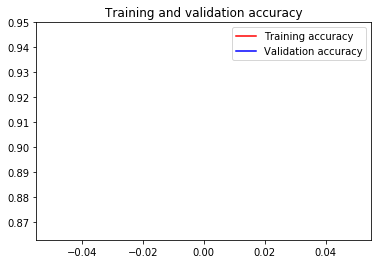

<Figure size 432x288 with 0 Axes>

In [270]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

score = model.evaluate(x_test, y_test,batch_size=10)
print(score[1])
# evaluate the model
#scores = model.evaluate_generator(test_generator)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [271]:
model.save("/kaggle/working/vgg16model.h5")

In [272]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score[1]*100)

86.69871687889099


In [273]:
from keras import backend as K
from keras import activations, constraints, initializers, regularizers
from keras.engine import InputSpec, Layer
from keras.layers import Dense
from keras.utils import conv_utils


class FactorizedDense(Layer):
    """Just your regular densely-connected NN layer.
    This layer based on `keras.layers.core.Dense` and behave like it.
    `FactorizedDense` implements the operation:
    `output = activation(dot(dot(input, pre_kernel), post_kernel) + bias)`
    where `activation` is the element-wise activation function
    passed as the `activation` argument, `pre_kernel` and `post_kernel` is a weights matrix
    created by the layer, and `bias` is a bias vector created by the layer
    (only applicable if `use_bias` is `True`).
    Note: if the input to the layer has a rank greater than 2, then
    it is flattened prior to the initial dot product with `pre_kernel`.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        components: Positive integer or None, the size of internal components.
            If given None, the output is calculated as the same manner as `Dense` layer.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you don't specify anything, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        pre_kernel_initializer: Initializer for the `kernel` weights matrix
            (see [initializers](../initializers.md)).
        post_kernel_initializer: Initializer for the `kernel` weights matrix
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        pre_kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        post_kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
    # Input shape
        nD tensor with shape: `(batch_size, ..., input_dim)`.
        The most common situation would be
        a 2D input with shape `(batch_size, input_dim)`.
    # Output shape
        nD tensor with shape: `(batch_size, ..., units)`.
        For instance, for a 2D input with shape `(batch_size, input_dim)`,
        the output would have shape `(batch_size, units)`.
    """
    target_layer_types = [Dense]

    def __init__(self, units, components,
                 activation=None,
                 use_bias=True,

                 pre_kernel_initializer='glorot_uniform',
                 post_kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',

                 pre_kernel_regularizer=None,
                 post_kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,

                 pre_kernel_constraint=None,
                 post_kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(FactorizedDense, self).__init__(**kwargs)
        self.units = units
        self.components = components
        self.activation = activations.get(activation)
        self.use_bias = use_bias

        self.pre_kernel_initializer = initializers.get(pre_kernel_initializer)
        self.post_kernel_initializer = initializers.get(post_kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.pre_kernel_regularizer = regularizers.get(pre_kernel_regularizer)
        self.post_kernel_regularizer = regularizers.get(post_kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.pre_kernel_constraint = constraints.get(pre_kernel_constraint)
        self.post_kernel_constraint = constraints.get(post_kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        is_factorized = self.components is not None

        if is_factorized:
            shape = (input_dim, self.components)
        else:
            shape = (input_dim, self.units)

        self.pre_kernel = self.add_weight(shape,
                                          initializer=self.pre_kernel_initializer,
                                          name='pre_kernel',
                                          regularizer=self.pre_kernel_regularizer,
                                          constraint=self.pre_kernel_constraint)

        if not is_factorized:
            self.post_kernel = None
        else:
            self.post_kernel = self.add_weight((self.components, self.units),
                                               initializer=self.post_kernel_initializer,
                                               name='kernel',
                                               regularizer=self.post_kernel_regularizer,
                                               constraint=self.post_kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight((self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def call(self, inputs):
        h = K.dot(inputs, self.pre_kernel)
        if self.post_kernel is not None:
            h = K.dot(h, self.post_kernel)
        if self.use_bias:
            h = K.bias_add(h, self.bias)
        if self.activation is not None:
            h = self.activation(h)
        return h

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        assert input_shape[-1]
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def get_config(self):
        config = {
            'units': self.units,
            'activation': activations.serialize(self.activation),
            'components': self.components,
            'use_bias': self.use_bias,

            'pre_kernel_initializer': initializers.serialize(self.pre_kernel_initializer),
            'post_kernel_initializer': initializers.serialize(self.post_kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),

            'pre_kernel_regularizer': regularizers.serialize(self.pre_kernel_regularizer),
            'post_kernel_regularizer': regularizers.serialize(self.post_kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),

            'pre_kernel_constraint': constraints.serialize(self.pre_kernel_constraint),
            'post_kernel_constraint': constraints.serialize(self.post_kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(FactorizedDense, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class FactorizedConv2DTucker(Layer):
    """2D convolution layer with tucker decomposition.
    This layer is based on `keras.layers.convolution.Conv2D` and behave like it.
    The difference is the kernel is factorized by tucker decomposition.
    If `use_bias` is True, a bias vector is created and added to the outputs.
    Finally, if `activation` is not `None`, it is applied to the outputs as well.
    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of integers, does not include the sample axis),
    e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
    in `data_format="channels_last"`.
    # Arguments
        filters: Integer, the dimensionality of the output space
            (i.e. the number output of filters in the convolution).
        kernel_size: An integer or tuple/list of 2 integers, specifying the
            width and height of the 2D convolution window.
            Can be a single integer to specify the same value for
            all spatial dimensions.
        input_components: Integer or None, the number of components
            of kernel for the input channel axis. If given None, the
            factorization of input side is skipped.
        output_components: Integer or None, the number of components
            of kernel for the output channel axis. If given None, the
            factorization of output side is skipped.
        strides: An integer or tuple/list of 2 integers,
            specifying the strides of the convolution along the width and height.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Specifying any stride value != 1 is incompatible with specifying
            any `dilation_rate` value != 1.
        padding: one of `"valid"` or `"same"` (case-insensitive).
        data_format: A string,
            one of `channels_last` (default) or `channels_first`.
            The ordering of the dimensions in the inputs.
            `channels_last` corresponds to inputs with shape
            `(batch, width, height, channels)` while `channels_first`
            corresponds to inputs with shape
            `(batch, channels, width, height)`.
            It defaults to the `image_data_format` value found in your
            Keras config file at `~/.keras/keras.json`.
            If you never set it, then it will be "channels_last".
        dilation_rate: an integer or tuple/list of 2 integers, specifying
            the dilation rate to use for dilated convolution.
            Can be a single integer to specify the same value for
            all spatial dimensions.
            Currently, specifying any `dilation_rate` value != 1 is
            incompatible with specifying any stride value != 1.
        activation: Activation function to use
            (see [activations](../activations.md)).
            If you don't specify anything, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        pre_kernel_initializer: Initializer for the `kernel` weights matrix
            (see [initializers](../initializers.md)).
        kernel_initializer: Initializer for the `kernel` weights matrix
            (see [initializers](../initializers.md)).
        post_kernel_initializer: Initializer for the `kernel` weights matrix
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        pre_kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        post_kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        pre_kernel_constraint: Constraint function applied to the kernel matrix
            (see [constraints](../constraints.md)).
        kernel_constraint: Constraint function applied to the kernel matrix
            (see [constraints](../constraints.md)).
        post_kernel_constraint: Constraint function applied to the kernel matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
    # Input shape
        4D tensor with shape:
        `(samples, channels, rows, cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, rows, cols, channels)` if data_format='channels_last'.
    # Output shape
        4D tensor with shape:
        `(samples, filters, new_rows, new_cols)` if data_format='channels_first'
        or 4D tensor with shape:
        `(samples, new_rows, new_cols, filters)` if data_format='channels_last'.
        `rows` and `cols` values might have changed due to padding.
    """

    def __init__(self,
                 filters,
                 kernel_size,
                 input_components=None,
                 output_components=None,

                 strides=(1, 1),
                 padding='valid',
                 data_format=None,
                 dilation_rate=(1, 1),
                 activation=None,
                 use_bias=True,

                 pre_kernel_initializer='glorot_uniform',
                 kernel_initializer='glorot_uniform',
                 post_kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',

                 pre_kernel_regularizer=None,
                 kernel_regularizer=None,
                 post_kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,

                 pre_kernel_constraint=None,
                 kernel_constraint=None,
                 post_kernel_constraint=None,
                 bias_constraint=None,

                 **kwargs):
        super(FactorizedConv2DTucker, self).__init__(**kwargs)
        rank = 2
        self.rank = rank
        self.input_components = input_components
        self.output_components = output_components
        self.filters = filters
        self.output_components = output_components

        self.kernel_size = conv_utils.normalize_tuple(kernel_size, rank, 'kernel_size')
        self.strides = conv_utils.normalize_tuple(strides, rank, 'strides')
        self.padding = conv_utils.normalize_padding(padding)
        self.data_format = K.normalize_data_format(data_format)
        self.dilation_rate = conv_utils.normalize_tuple(dilation_rate, rank, 'dilation_rate')
        self.activation = activations.get(activation)
        self.use_bias = use_bias

        self.pre_kernel_initializer = initializers.get(pre_kernel_initializer)
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.post_kernel_initializer = initializers.get(post_kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.pre_kernel_regularizer = regularizers.get(pre_kernel_regularizer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.post_kernel_regularizer = regularizers.get(post_kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)

        self.pre_kernel_constraint = constraints.get(pre_kernel_constraint)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.post_kernel_constraint = constraints.get(post_kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.input_spec = InputSpec(ndim=rank + 2)  # batch, H, W, C

    def build(self, input_shape):
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')

        input_dim = input_shape[channel_axis]
        if self.input_components is None:
            input_components = input_dim
        else:
            input_components = self.input_components
        if self.output_components is None:
            output_components = self.filters
        else:
            output_components = self.output_components
        kernel_shape = self.kernel_size + (input_components, output_components)

        if self.input_components is None:
            self.pre_kernel = None
        else:
            pre_kernel_shape = (1, 1) + (input_dim, self.input_components)
            self.pre_kernel = self.add_weight(pre_kernel_shape,
                                              initializer=self.pre_kernel_initializer,
                                              name='pre_kernel',
                                              regularizer=self.pre_kernel_regularizer,
                                              constraint=self.pre_kernel_constraint)

        self.kernel = self.add_weight(kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)

        if self.output_components is None:
            self.post_kernel = None
        else:
            post_kernel_shape = (1, 1) + (self.output_components, self.filters)
            self.post_kernel = self.add_weight(post_kernel_shape,
                                               initializer=self.post_kernel_initializer,
                                               name='post_kernel',
                                               regularizer=self.post_kernel_regularizer,
                                               constraint=self.post_kernel_constraint)

        if self.use_bias:
            self.bias = self.add_weight((self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        # Set input spec.
        self.input_spec = InputSpec(ndim=self.rank + 2,
                                    axes={channel_axis: input_dim})
        self.built = True

    def call(self, inputs):
        h = inputs
        if self.pre_kernel is not None:
            h = K.conv2d(
                h,
                self.pre_kernel,
                strides=(1, 1),
                padding='valid',
                data_format=self.data_format,
                dilation_rate=(1, 1),
            )
        h = K.conv2d(
            h,
            self.kernel,
            strides=self.strides,
            padding=self.padding,
            data_format=self.data_format,
            dilation_rate=self.dilation_rate,
        )
        if self.post_kernel is not None:
            h = K.conv2d(
                h,
                self.post_kernel,
                strides=(1, 1),
                padding='valid',
                data_format=self.data_format,
                dilation_rate=(1, 1),
            )

        outputs = h
        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)

        if self.activation is not None:
            return self.activation(outputs)
        return outputs

    def compute_output_shape(self, input_shape):
        if self.data_format == 'channels_last':
            space = input_shape[1:-1]
            new_space = []
            for i in range(len(space)):
                new_dim = conv_utils.conv_output_length(
                    space[i],
                    self.kernel_size[i],
                    padding=self.padding,
                    stride=self.strides[i],
                    dilation=self.dilation_rate[i])
                new_space.append(new_dim)
            return (input_shape[0],) + tuple(new_space) + (self.filters,)
        if self.data_format == 'channels_first':
            space = input_shape[2:]
            new_space = []
            for i in range(len(space)):
                new_dim = conv_utils.conv_output_length(
                    space[i],
                    self.kernel_size[i],
                    padding=self.padding,
                    stride=self.strides[i],
                    dilation=self.dilation_rate[i])
                new_space.append(new_dim)
            return (input_shape[0], self.filters) + tuple(new_space)

    def get_config(self):
        config = {
            'input_components': self.input_components,
            'output_components': self.output_components,
            'filters': self.filters,

            'kernel_size': self.kernel_size,
            'strides': self.strides,
            'padding': self.padding,
            'data_format': self.data_format,
            'dilation_rate': self.dilation_rate,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,

            'pre_kernel_initializer': initializers.serialize(self.pre_kernel_initializer),
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'post_kernel_initializer': initializers.serialize(self.post_kernel_initializer),
            'bias_initializer': initializers.serialize(self.kernel_initializer),

            'pre_kernel_regularizer': regularizers.serialize(self.pre_kernel_regularizer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'post_kernel_regularizer': regularizers.serialize(self.post_kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),

            'pre_kernel_constraint': constraints.serialize(self.pre_kernel_constraint),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'post_kernel_constraint': constraints.serialize(self.post_kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(FactorizedConv2DTucker, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


custom_layers = {
    'FactorizedConv2DTucker': FactorizedConv2DTucker,
    'FactorizedDense': FactorizedDense,
}

In [274]:
from typing import Any, Dict, List

from keras.engine.topology import Layer, Node


def swap_layer_connection(old_layer: Layer, new_layer: Layer) -> None:
    '''connect nodes of calc graph for new_layer and disconnect ones for old_layers
    Keras manages calculation graph by nodes which hold connection between
    layres. To swap old layer and new layer, it is required to delete nodes
    of old layer and to create new nodes of new layer.
    :arg old_layer: Old layer. The connection to/from this layer will be removed.
    :arg new_layer: New layer. The connection to/from old layer will be connected to/from
        this layer.
    :return: None
    '''

    # the set of inbound layer which have old outbound_node
    inbound_layers = set()

    # create new inbound nodes
    for node in old_layer._inbound_nodes:  # type: Node
        Node(
            new_layer, node.inbound_layers,
            node.node_indices, node.tensor_indices,
            node.input_tensors, node.output_tensors,
            node.input_masks, node.output_masks,
            node.input_shapes, node.output_shapes,
        )
        inbound_layers.union(set(node.inbound_layers))

    # remove old outbound node of inbound layers
    for layer in inbound_layers:  # type: Layer
        old_nodes = filter(
            lambda n: n.outbound_layer == old_layer,
            layer._outbound_nodes,
        )
        for n in old_nodes:  # type: Node
            layer._outbound_nodes.remove(n)

    # the set of outbound layer which have old inbound_nodes
    outbound_layers = set()
    # create new outbound nodes
    for node in old_layer._outbound_nodes:  # type: Node
        layers = list(node.inbound_layers)
        while old_layer in layers:
            idx = layers.index(old_layer)
            layers[idx] = new_layer
        Node(
            node.outbound_layer, layers,
            node.node_indices, node.tensor_indices,
            node.input_tensors, node.output_tensors,
            node.input_masks, node.output_masks,
            node.input_shapes, node.output_shapes,
        )
        outbound_layers.add(node.outbound_layer)

    # remove old inbound_node of outbound layers
    for layer in outbound_layers:  # type: Layer
        old_nodes = filter(
            lambda n: old_layer in n.inbound_layers,
            layer._inbound_nodes,
        )
        for n in old_nodes:
            layer._inbound_nodes.remove(n)


def convert_config(
        base_config: Dict[str, Any],
        ignore_args: List[str],
        converts: Dict[str, List[str]],
        new_kwargs: Dict[str, Any]
) -> Dict[str, Any]:
    '''convert old layer's config to new layer's config.
    :param base_config: Base config. Generally a config of old layer.
    :param ignore_args: Ignore arg names. Not required arg names in new layer,
        though them is required in old layer.
    :param converts: Ignore name conversion dictionary, whose key is old layer's
        arg name in base_config, and whose value is new layer's arg names(list).
    :param new_kwargs: The new kwargs.
    :return: Converted config.
    '''
    kwargs = {}
    for k, v in base_config.items():
        if k in ignore_args:
            continue
        elif k in converts:
            for new_k in converts[k]:
                kwargs[new_k] = v
        else:
            kwargs[k] = v
    kwargs.update(new_kwargs)
    return kwargs

In [275]:
from typing import List, Optional, Type

from keras.layers import Layer


class Factorizer:
    factorize_target_layers = []  # type: List[Type[Layer]]

    @classmethod
    def compress(cls, layer: Layer, acceptable_error: float) -> Optional[Layer]:
        """try to compress the layer under acceptable_error.
        Outputs compressed layer if compression succeeded. If not, return None.
        :param layer:
        :param acceptable_error:
        :return:
        """
        raise NotImplementedError

In [276]:
import logging
import math
from typing import Optional, Tuple

import numpy as np
from keras import backend as K
from keras.engine import Layer
from keras.layers import Dense
from sklearn.utils.extmath import randomized_svd


logger = logging.getLogger(__name__)


class SVDFactorizer(Factorizer):
    factorize_target_layers = [Dense]

    @staticmethod
    def _factorize(W: np.ndarray, components: int):
        """
        :param W: I x O
        :param components: K
        :return:
            U: I x K
            V: K x O
        """
        u, s, v = randomized_svd(W, components)
        scale = np.diag(np.sqrt(s))
        U, V = u.dot(scale).astype(W.dtype), scale.dot(v).astype(W.dtype)
        return U, V

    @staticmethod
    def _calc_error(W: np.ndarray, U: np.ndarray, V: np.ndarray):
        '''
        :param W: I x O
        :param U: I x K
        :param V: K x O
        :return:
        '''
        elemental_error = np.abs(W - U.dot(V))
        error_bound = np.mean(elemental_error) / np.mean(np.abs(W))
        return error_bound

    @classmethod
    def compress(cls, old_layer: Dense, acceptable_error: float) -> Optional[Layer]:
        '''compress old_layer under acceptable error using SVD.
        If it can't reduce the number of parameters, returns None,
        :param old_layer:
        :param acceptable_error:
        :return:
        '''
        W = K.get_value(old_layer.kernel)
        logger.debug('factorization start W.shape:{}'.format(W.shape))

        max_comps = math.floor(np.size(W) / sum(W.shape))
        U, V = cls._factorize(W, max_comps)
        if cls._calc_error(W, U, V) >= acceptable_error:
            # Factorizer can't reduce the number of parameters in acceptable error by SVD.
            # So, this factorizer failed compression.
            return None

        U, V = cls._compress_in_acceptable_error(
            W, acceptable_error,
            start_param_range=range(1, max_comps),
        )
        components = U.shape[-1]

        base_config = old_layer.get_config()

        new_config = convert_config(
            base_config,
            ignore_args=[
                'kernel_constraint',
            ],
            converts={
                'kernel_regularizer': [
                    'pre_kernel_regularizer',
                    'post_kernel_regularizer',
                ],
                'kernel_initializer': [
                    'pre_kernel_initializer',
                    'post_kernel_initializer',
                ]
            },
            new_kwargs={
                'components': components,
            },
        )

        new_layer = FactorizedDense(**new_config)
        new_layer.build(old_layer.get_input_shape_at(0))  # to initialize weight variables

        K.set_value(new_layer.pre_kernel, U)
        K.set_value(new_layer.post_kernel, V)

        return new_layer

    @classmethod
    def _compress_in_acceptable_error(cls, W, acceptable_error: float, start_param_range: range) \
            -> Tuple[np.ndarray, np.ndarray]:
        param_range = start_param_range
        while len(param_range) > 0:  # while not (param_range.start == param_range.stop)
            logger.debug('current param_range:{}'.format(param_range))
            if len(param_range) == 1:
                ncomp = param_range.start
            else:
                ncomp = round((param_range.start + param_range.stop) / 2)

            U, V = cls._factorize(W, ncomp)
            error = cls._calc_error(W, U, V)

            if error <= acceptable_error:  # smallest ncomp is equal to or smaller than ncomp
                # On the assumption that `error` monotonically decreasing by increasing ncomp
                logger.debug('under acceptable error ncomp:{} threshold:{} error:{}'.format(
                    ncomp, acceptable_error, error,
                ))
                param_range = range(param_range.start, ncomp)
            else:  # the best is larger than ncomp
                logger.debug('over acceptable error ncomp:{} threshold:{} error:{}'.format(
                    ncomp, acceptable_error, error,
                ))
                param_range = range(ncomp + 1, param_range.stop)

        # param_range.start == param_range.stop
        smallest_ncomp = param_range.start
        logger.debug('smallest_ncomp:{}, W.shape:{} compress_rate:{}'.format(
            smallest_ncomp, W.shape, sum(W.shape) * smallest_ncomp / np.size(W),
        ))
        U, V = cls._factorize(W, smallest_ncomp)
        return U, V

In [277]:
import itertools
import logging
import math
from queue import PriorityQueue
from typing import Optional, Tuple

import numpy as np
from keras import backend as K
from keras.layers import Conv2D

from sklearn.utils.extmath import randomized_svd

logger = logging.getLogger(__name__)

__all__ = ['TuckerFactorizer']


class ProblemData:
    '''Parameter search problem data structure
    '''

    def __init__(self, x_range: range, y_range: range):
        self.x_range = x_range
        self.y_range = y_range

    def __str__(self):
        return '<Problem x_range={} y_range={}>'.format(
            self.x_range, self.y_range,
        )

    def __lt__(self, other: 'ProblemData'):
        return self.diag_length < other.diag_length

    def __eq__(self, other: 'ProblemData'):
        return self.x_range == other.x_range and self.y_range == other.y_range

    @property
    def diag_length(self):
        return math.sqrt(len(self.x_range) ** 2 + len(self.y_range) ** 2)


class Tucker:
    '''Pure tucker decomposition functions
    '''

    @classmethod
    def factorize(cls, W: np.ndarray, in_comps: Optional[int], out_comps: Optional[int]) \
            -> Tuple[np.ndarray, Optional[np.ndarray], Optional[np.ndarray]]:
        """pure tucker decomposition
        :param W: W x H x I x O
        :param in_comps: N
        :param out_comps:  M
        :return:
            C: W x H x N x M,
            U_in: I x N
            U_out: O x M
        """

        if in_comps is None:
            U_in = None
        else:
            U_in, _, _ = randomized_svd(cls._flatten(W, 2), in_comps)
            U_in = U_in.astype(W.dtype)

        if out_comps is None:
            U_out = None
        else:
            U_out, _, _ = randomized_svd(cls._flatten(W, 3), out_comps)
            U_out = U_out.astype(W.dtype)

        C = W.copy()

        if U_in is not None:
            C = np.einsum('whio,in->whno', C, U_in)

        if U_out is not None:
            C = np.einsum('whno,om->whnm', C, U_out)

        C = C.astype(W.dtype)

        return C, U_in, U_out

    @staticmethod
    def _get_matrix(W: np.ndarray, i: int, axis: int) -> np.ndarray:
        '''util function for tucker decomposition
        :param W:
        :param i:
        :param axis:
        :return:
        '''
        sli = [slice(None) for _ in range(W.ndim)]
        sli[axis] = i
        return W[sli]

    @classmethod
    def _flatten(cls, W: np.ndarray, axis: int) -> np.ndarray:
        '''util function for tucker decomposition
        :param W:
        :param axis:
        :return:
        '''
        dim = 1
        dims = []
        for i, v in enumerate(W.shape):
            if i != axis:
                dim *= v
                dims.append(v)
        res = np.zeros((W.shape[axis], dim))
        for i in range(W.shape[axis]):
            res[i] = cls._get_matrix(W, i, axis).ravel()
        return res


class TuckerParamSearcher:
    '''tucker decomposition parameter searcher
    '''

    def __init__(self, W: np.ndarray):
        width, height, in_dim, out_dim = W.shape
        self.width = width
        self.height = height
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.W = W

        self.best_point = None
        self.best_param_num = width * height * in_dim * out_dim

        self.prob_queue = PriorityQueue()

    def add_problem(self, prob: ProblemData):
        param_num = self.calc_min_param_num_by(prob)
        self.prob_queue.put((param_num, prob))

    def calc_min_param_num_by(self, prob: ProblemData):
        res = []
        for in_comp, out_comp in itertools.product(
                [prob.x_range.start, prob.x_range.stop],
                [prob.y_range.start, prob.y_range.stop],
        ):
            res.append(self.calc_param_num(in_comp, out_comp))
        return min(res)

    def calc_param_num(self, in_comp: int, out_comp: int):
        params = self.width * self.height * in_comp * out_comp
        if in_comp != self.in_dim:  # compression in input channel
            params += self.in_dim * in_comp
        if out_comp != self.out_dim:  # compression in output channel
            params += self.out_dim * out_comp
        return params

    def update_best_point_if_needed(self, in_comp, out_comp):
        current_param_num = self.calc_param_num(in_comp, out_comp)
        if current_param_num < self.best_param_num:
            self.best_point = (in_comp, out_comp)
            self.best_param_num = current_param_num
            logger.debug('update best_point={} best_param_num={}'.format(
                self.best_point, self.best_param_num,
            ))

    def factorize_in_acceptable_error(self, acceptable_error: float) \
            -> Tuple[np.ndarray, Optional[np.ndarray], Optional[np.ndarray]]:
        """
        :param W: W x H x I x O
        :param acceptable_error:
        :param initial_problems: initial problems
        :return:
            C: W x H x N x M
            U_in: I x N
            U_out: O x M
        """

        # Search N and M whose the number of parameter is the smallest
        # under acceptable error.

        # This algorithm is based on divide and conquer algorithm and
        # based on the assumption that `error` monotonically decrease by increasing N or M.

        width, height, in_dim, out_dim = self.width, self.height, self.in_dim, self.out_dim

        self.add_problem(ProblemData(range(in_dim, in_dim), range(out_dim, out_dim)))
        if 2 <= in_dim and 2 <= out_dim:
            self.add_problem(ProblemData(range(1, in_dim - 1), range(1, out_dim - 1)))
        if 1 <= in_dim:
            self.add_problem(ProblemData(range(in_dim, in_dim), range(1, out_dim - 1)))
        if 1 <= out_dim:
            self.add_problem(ProblemData(range(1, in_dim - 1), range(out_dim, out_dim)))

        while not self.prob_queue.empty():
            _, current_prob = self.prob_queue.get()  # type: ProblemData

            if self.best_param_num < self.calc_min_param_num_by(current_prob):
                logger.debug('no more best_param_num:{} prob:{}'.format(self.best_param_num, current_prob))
                break

            if len(current_prob.x_range) == 0 and len(current_prob.y_range) == 0:
                self.update_best_point_if_needed(current_prob.x_range.start, current_prob.y_range.start)
                continue

            logger.debug('current queue.size:{} prob:{}'.format(
                self.prob_queue.qsize(), current_prob,
            ))

            result = self._find_edge_point(
                acceptable_error, current_prob,
            )  # type: Optional[Tuple[int,int]]

            logger.debug('result={} prob={}'.format(
                result, current_prob
            ))

            if result is None:
                continue

            x, y = result  # type: Tuple[int, int]
            self.update_best_point_if_needed(x, y)

            # divide current problem to sub-problems

            if len(current_prob.x_range) == 0 or len(current_prob.y_range) == 0:
                # X.
                #  Y
                logger.debug('no sub-problem:{}'.format(current_prob))
                continue

            if len(current_prob.x_range) == 1 and len(current_prob.y_range) == 1:
                # X# -> (| and _) or .
                #  Y
                if x == current_prob.x_range.stop and y == current_prob.y_range.stop:
                    # right top point
                    #        _
                    # X# -> X  and  |
                    #  Y     Y     Y
                    sub_prob1 = ProblemData(
                        x_range=range(current_prob.x_range.start, x),
                        y_range=range(y, y),
                    )
                    sub_prob2 = ProblemData(
                        x_range=range(x, x),
                        y_range=range(current_prob.y_range.start, y),
                    )
                    self.add_problem(sub_prob1)
                    self.add_problem(sub_prob2)
                    logger.debug('two sub-problems:{}, (x,y)=({},{}) -> {},{}'.format(
                        current_prob, x, y,
                        sub_prob1, sub_prob2
                    ))
                    continue
                else:  # x == current_prob.x_range.start and y == current_prob.y_range.start
                    logger.debug('no sub-problem:{}'.format(current_prob))
                    continue

            if len(current_prob.x_range) == 1 and len(current_prob.y_range) > 1:
                # X####### -> X   |
                #     Y          Y
                sub_prob = ProblemData(
                    x_range=current_prob.x_range,
                    y_range=range(y, y)
                )
                logger.debug('one row space, one sub-problem:{}, (x,y)=({},{}) -> {}'.format(
                    current_prob, x, y,
                    sub_prob,
                ))
                continue

            if len(current_prob.x_range) > 1 and len(current_prob.y_range) == 1:
                #  #     _
                # X# -> X
                #  #     Y
                #  Y
                sub_prob = ProblemData(
                    x_range=range(x, x),
                    y_range=current_prob.y_range,
                )
                logger.debug('one column space, one sub-problem:{}, (x,y)=({},{}) -> {}'.format(
                    current_prob, x, y,
                    sub_prob,
                ))

            if len(current_prob.x_range) >= 2 and len(current_prob.y_range) >= 2:
                #  ###     ##
                # X### -> X##  and X
                #  ###                #
                #   Y       Y        Y
                sub_prob1 = ProblemData(
                    x_range=range(current_prob.x_range.start, x),
                    y_range=range(y, current_prob.y_range.stop),
                )
                sub_prob2 = ProblemData(
                    x_range=range(x, current_prob.x_range.stop),
                    y_range=range(current_prob.y_range.start, y),
                )
                self.add_problem(sub_prob1)
                self.add_problem(sub_prob2)
                logger.debug('two sub-problems:{}, (x,y)=({},{}) -> {},{}'.format(
                    current_prob, x, y,
                    sub_prob1, sub_prob2
                ))
                continue
        if self.best_point is None:
            logger.debug('no factorization is best')
            return self.W, None, None

        in_comp, out_comp = self.best_point
        if in_comp >= self.in_dim:
            in_comp = None
        if out_comp >= self.out_dim:
            out_comp = None
        C, U_in, U_out = Tucker.factorize(self.W, in_comp, out_comp)
        return C, U_in, U_out

    def _find_edge_point(self, acceptable_error: float, current_prob: ProblemData) -> Optional[Tuple[int, int]]:
        x_range = current_prob.x_range
        y_range = current_prob.y_range

        acceptable_points = []
        # consider that acceptable point doesn't exist in the current_prob space.

        while len(x_range) > 0 or len(y_range) > 0:
            if len(x_range) in [0, 1]:
                x = x_range.start
            else:
                x = round((x_range.start + x_range.stop) / 2)
            if len(y_range) in [0, 1]:
                y = y_range.start
            else:
                y = round((y_range.start + y_range.stop) / 2)

            logger.debug('binary search (x,y)=({}, {}) x_range={} y_range={} prob={}'.format(
                x, y, x_range, y_range, current_prob
            ))

            C, U_in, U_out = Tucker.factorize(self.W, x, y)

            error = self.calc_error(self.W, C, U_in, U_out)
            if error < acceptable_error:
                logger.debug('binary search: under threshold={} error={}'.format(
                    acceptable_error, error,
                ))
                acceptable_points.append((x, y))

                # update ranges
                x_range = range(x_range.start, x)
                y_range = range(y_range.start, y)
            else:
                logger.debug('binary search: over threshold={} error={}'.format(
                    acceptable_error, error,
                ))

                # update ranges
                if x + 1 <= x_range.stop:
                    new_x_start = x + 1
                else:
                    new_x_start = x
                x_range = range(new_x_start, x_range.stop)

                if y + 1 <= y_range.stop:
                    new_y_start = y + 1
                else:
                    new_y_start = y
                y_range = range(new_y_start, y_range.stop)
        if len(acceptable_points) == 0:
            return None
        else:
            return acceptable_points[-1]

    @staticmethod
    def calc_error(W: np.ndarray, C: np.ndarray, U_in: np.ndarray, U_out: np.ndarray) -> float:
        """calculate expected bound of error of output of layer
        :param W: W x H x I x O
        :param C: W x H x N x M
        :param U_in: I x N
        :param U_out: O x M
        :return:
        """
        W_hat = np.einsum('whnm,in,om->whio', C, U_in, U_out)
        elemental_error = np.abs(W - W_hat)
        error_bound = np.mean(elemental_error) / np.mean(np.abs(W))
        return error_bound


class TuckerFactorizer(Factorizer):
    factorize_target_layers = [Conv2D]

    @classmethod
    def compress(cls, old_layer: Conv2D, acceptable_error: float) -> Optional[FactorizedConv2DTucker]:
        '''Compress layer's kernel 4D tensor using tucker decomposition under acceptable_error.
        If it can't reduce the number of parameters, returns `None`.
        :param old_layer:
        :param acceptable_error:
        :return:
        '''
        W = K.get_value(old_layer.kernel)
        searcher = TuckerParamSearcher(W)
        C, U_in, U_out = searcher.factorize_in_acceptable_error(acceptable_error)

        kernel = C

        if U_in is None and U_out is None:  # compression failed
            return None

        if U_in is None:
            input_components = None
            pre_kernel = None
        else:
            input_components = U_in.shape[1]
            pre_kernel = U_in[np.newaxis, np.newaxis, :, :]

        if U_out is None:
            output_components = None
            post_kernel = None
        else:
            output_components = U_out.shape[1]
            post_kernel = U_out.T[np.newaxis, np.newaxis, :, :]

        base_config = old_layer.get_config()

        new_config = convert_config(
            base_config,
            ignore_args=[
                'kernel_constraint',
            ],
            converts={
                'kernel_regularizer': [
                    'pre_kernel_regularizer',
                    'kernel_regularizer',
                    'post_kernel_regularizer',
                ],
                'kernel_initializer': [
                    'pre_kernel_initializer',
                    'kernel_initializer',
                    'post_kernel_initializer',
                ],
            },
            new_kwargs={
                'input_components': input_components,
                'output_components': output_components,
            }
        )

        new_layer = FactorizedConv2DTucker(**new_config)
        new_layer.build(old_layer.get_input_shape_at(0))  # to initialize weight variables

        K.set_value(new_layer.kernel, kernel)

        if pre_kernel is not None:
            K.set_value(new_layer.pre_kernel, pre_kernel)
        if post_kernel is not None:
            K.set_value(new_layer.post_kernel, post_kernel)
        return new_layer

In [278]:
import logging
from collections import defaultdict
from typing import Dict, List, Type

from keras.engine import Layer, Model



logger = logging.getLogger(__name__)


def compress(model: Model, acceptable_error: float,
             factorizers=None) -> Model:
    """compress model under acceptable error
    compress each model's layer by using given factorizers.
    If the factorizer compress the layer, swap the layer and compressed layer by re-creating
    node on computational graph.
    :param model: Target model
    :param acceptable_error: Layer-wize acceptable output error. If this value is smaller
        the compressed model will be more accurate. The calculation process of this error is
        depend on each factorizer. So see the implementation.
    :param factorizers: Applicable factorizers. Factorizer factorize each layer if factorizer
        can factorize the layer.
    :return: Compressed model
    """
    if factorizers is None:
        factorizers = [SVDFactorizer, TuckerFactorizer]
    layer2factorizers = defaultdict(list)  # type: Dict[Type[Layer], List[Type[Factorizer]]]
    for fact in factorizers:
        for layer in fact.factorize_target_layers:
            layer2factorizers[layer].append(fact)

    for layer_idx, layer in enumerate(model.layers):
        layer_class = type(layer)
        if layer_class not in layer2factorizers:
            logger.info(
                'factorizer not found layer:{!r}'.format(layer)
            )
            continue

        new_layer = None
        for factorizer in layer2factorizers[layer_class]:  # type: Factorizer
            logger.info(
                'factorizer found layer:{!r} factorizer:{!r}'.format(
                    layer, factorizer,
                )
            )
            new_layer = factorizer.compress(layer, acceptable_error)
            if new_layer is None:  # failed factorization
                logger.info(
                    'factorization failed layer:{!r} factorizer:{!r}'.format(
                        layer, factorizer,
                    )
                )
                continue
            else: # succeeded factorization
                break

        if new_layer is not None:
            logger.info(
                'swap old/new layer old_layer:{!r} new_layer{!r}'.format(
                    layer, new_layer,
                )
            )
            swap_layer_connection(layer, new_layer)
            model.layers[layer_idx] = new_layer
                      
    new_model = Model(model.input, model.output)
    new_model.compile(
        optimizer=model.optimizer.__class__.__name__,  # TODO: improve here
        # model.optimizer is instance of Optimizer and hold some variables for target model.
        # Optimizer must be re-initialized, because compress function changes model structure.
        loss=model.loss,
        metrics=model.metrics,
        loss_weights=model.loss_weights,
        sample_weight_mode=model.sample_weight_mode,
    )
    return new_model

In [279]:
from keras.models import load_model
model1=model


new_model = compress(model1, 3e-1)
#model.save('/kaggle/working/SvdTucker.h5')
new_model.summary()
score = new_model.evaluate(x_test, y_test,batch_size=10)
print(score[1])


TypeError: object of type 'Dropout' has no len()

In [ ]:
if (new_model==model1):
    print("yes")
else: print("no")


In [ ]:
model.summary()